In [36]:
import pandas as pd
from fuzzywuzzy import fuzz

In [2]:
chatlog = pd.read_csv('../excel/chatlog_all.csv')

In [4]:
chatlog = chatlog.astype(str)
chatlog

,userId,full_name,message,role,time,_date,_time
0,2887882827928310,Kookkik Kanokjan,DLJingjai,User,2020-05-30 21:53:11,2020-05-30,21:53
1,4141996792507270,Aomruthai Sawatkit,ประกันชั้น 1 \nรถ โตโยต้า อินโนว่า ปี 2012 เบี...,User,2020-05-30 21:58:12,2020-05-30,21:58
2,3019573031433685,วัชพล แก้วสว่าง,ขออภัยครับ,User,2020-05-30 23:46:09,2020-05-30,23:46
3,3019573031433685,วัชพล แก้วสว่าง,ขออภัยครับ,User,2020-05-30 23:49:36,2020-05-30,23:49
4,3019573031433685,วัชพล แก้วสว่าง,369239263222822,User,2020-05-30 23:49:40,2020-05-30,23:49
...,...,...,...,...,...,...,...
810951,3304347986289114,Jeab Jeab,"{'type': 'text', 'text': 'พี่คับๆ ขอชื่อ-นามสก...",Admin,2020-07-22 22:00:56,2020-07-22,22:00
810952,3643709548990195,Thitima Lapa,"{""type"":""legacy_reply_to_message_action"",""mess...",User,2020-07-22 22:01:13,2020-07-22,22:01
810953,3643709548990195,Thitima Lapa,"{'type': 'text', 'text': 'ผม ""จริงใจ"" พร้อมดูแ...",Admin,2020-07-22 22:01:16,2020-07-22,22:01
810954,3643709548990195,Thitima Lapa,"{'type': 'image', 'list_object': [{'original_u...",Admin,2020-07-22 22:01:16,2020-07-22,22:01


In [5]:
# Clean the chatlog to have only user conversation on specific date
def clean_chatlog(df, start_date:str='2019-11-01', end_date:str='9999-12-01'):
    # df = chatlog[['userId', 'message', 'role', '_date']] 
    df = df.loc[df.role=='User']
    return df[(df._date >= start_date) & (df._date <= end_date)]

In [73]:
def merge_message_by_id(chatlog):
    df = chatlog.groupby(['userId'])['message'].apply(','.join).reset_index()
    return df

In [74]:
chatlog_clean = clean_chatlog(chatlog)
chatlog_clean_groupped = merge_message_by_id(chatlog_clean)

In [6]:
def get_female_message(chatlog):
  messages = chatlog['message']
  female = ['คะ', 'ค่ะ', 'ค่า', 'คระ', 'คร่ะ', 'คร๊', 'ค๊', 'คร้า']
  female_msg = messages[messages.str.contains('|'.join(female))]
  return female_msg

In [75]:
female_message = get_female_message(chatlog_clean_groupped)

In [76]:
female_msg = female_message.to_frame()

In [77]:
female_msg

,message
0,"สอบถามค่ะ,ประกันรถยนต์ค่ะ,สอบถามค่าเบี้ยประกัน..."
1,"รบกวนสอบถามค่ะ,ปัจจุบันมีสินเชื่ออยู่แล้ว ต้อง..."
4,"DLJingjai,โตโยต้า อัลติส 2011,ประกันชั้น 1 เท่..."
5,"แอดค่ะสอบถามค่ะ,สไตล์ชัดเจน,รายละเอียดสินเชื่อ..."
6,"780919948781599,สอบถามหน่อยค่ะ,https://sconten..."
...,...
41493,"ประกันมีราคาเท่ารัยค่ะ,DLJingjai,นิสสันฟรอนเที..."
41495,"nan,ชั้น1เบี้ยเท่าไรคะ"
41496,"รถ ค.ศ 2016.,กู้สูงสุดเท่าไรค่ะ.\nผ่อนเดือนประ..."
41497,"รับรีไฟแนนซ์รถไหมค่ะ,ติดต่อเจ้าหน้าที่~S,จัดไฟ..."


In [85]:
def get_male_message(chatlog):
  messages = chatlog['message']
  male = ['ครับ', 'คับ', 'คั้บ', 'ค้าบ', 'คัฟ', 'คร้าบ', 'คาฟ', 'ค้าฟ', 'ฮะ', 'ฮับ', 'ฮ้าฟ']
  male_msg = messages[messages.str.contains('|'.join(male))]
  return male_msg

In [86]:
male_message = get_male_message(chatlog_clean_groupped)

In [87]:
male_msg = male_message.to_frame()
male_msg

,message
2,"พนักงานเร่งรัดหนี้สินภาคสนามรับอยู่ไหมครับ,พนั..."
7,"ทำไม่บัตรเงินกดเงินไม่ใด้,ตู้บอกว่าติดต่อกับเจ..."
10,"nan,ใช้หลักฐานอะไรมั้งคับ,กู้20,000 ต้องทำอย่า..."
12,"ถ้ารถกำลังส่งงวดอยู่ รีไฟแนนซ์​ได้ไหมครับ,มอเต..."
13,"รถเหลืออีก5เดือนเข้าได้มั้ยครับ#มอเตอร์ไซค์,รถ..."
...,...
41485,"{""type"":""legacy_reply_to_message_action"",""mess..."
41487,สวัสดีครับรบกวนขอเบอร์โทรเงินติดล้อสาขาจอหอจัง...
41488,"DLJingjai,nan,ซื้อประกัน,Mazda2 2018 คับ,1 คั..."
41491,"เดือนนี้ผมยอดชำระมั้ยครับ,ถ้าจ่ายจ่ายเต็มหรือจ..."


In [19]:
intent_prop = pd.read_csv('../excel/intent_prop.csv')

In [30]:
top_10_intent = intent_prop.iloc[:10]
top_10_intent

,Unnamed: 0,Intent,Keyword,intent,Keyword_norm
0,0,corona,20804,corona,0.191458
1,1,ค้นหาสาขา~S,12921,ค้นหาสาขา~S,0.118911
2,2,รายละเอียดสินเชื่อ~S,9174,รายละเอียดสินเชื่อ~S,0.084428
3,3,รายละเอียดประกันรถยนต์~S,6138,รายละเอียดประกันรถยนต์~S,0.056488
4,4,สอบถามค่าเบี้ยประกันรถคันโปรด~S,4917,สอบถามค่าเบี้ยประกันรถคันโปรด~S,0.045251
5,5,บริการลูกค้าปัจจุบัน,4690,บริการลูกค้าปัจจุบัน,0.043162
6,6,ขอข้อมูลประกัน~S,4533,ขอข้อมูลประกัน~S,0.041717
7,7,เงื่อนไขการรีไฟแนนซ์รถยนต์~S,4175,เงื่อนไขการรีไฟแนนซ์รถยนต์~S,0.038422
8,8,เงื่อนไขการซื้อประกันแบบผ่อน0%~S,3501,เงื่อนไขการซื้อประกันแบบผ่อน0%~S,0.032219
9,9,สินเชื่อทะเบียนรถจักรยานยนต์~S,3237,สินเชื่อทะเบียนรถจักรยานยนต์~S,0.029790


In [33]:
intent_list = top_10_intent['intent'].tolist()
intent_list

['corona',
 'ค้นหาสาขา~S',
 'รายละเอียดสินเชื่อ~S',
 'รายละเอียดประกันรถยนต์~S',
 'สอบถามค่าเบี้ยประกันรถคันโปรด~S',
 'บริการลูกค้าปัจจุบัน',
 'ขอข้อมูลประกัน~S',
 'เงื่อนไขการรีไฟแนนซ์รถยนต์~S',
 'เงื่อนไขการซื้อประกันแบบผ่อน0%~S',
 'สินเชื่อทะเบียนรถจักรยานยนต์~S']

In [78]:
female_msg_list = female_msg['message'].tolist()
len(female_msg_list)

22850

In [88]:
male_msg_list = male_msg['message'].tolist()
len(male_msg_list)

13407

## Find corona intent proportion

In [189]:
female_corona_list = []
for i in range(len(female_msg_list)):
    female_corona_list.append(fuzz.partial_ratio(female_msg_list[i], intent_list[0]))
#     female_corona_list[i] = fuzz.partial_ratio(female_msg_list[i], intent_list[0])
    i = i + 1

In [190]:
male_corona_list = []
for i in range(len(male_msg_list)):
    male_corona_list.append(fuzz.partial_ratio(male_msg_list[i], intent_list[0]))
#     female_corona_list[i] = fuzz.partial_ratio(female_msg_list[i], intent_list[0])
    i = i + 1

In [38]:
fuzz.partial_ratio("สนใจประกันชั้น1 รถนิสสันอเมร่า ปี2019 ค่ะ", "รายละเอียดประกันรถยนต์~S")

33

In [80]:
len(female_corona_list)

22850

In [90]:
len(male_corona_list)

13407

In [191]:
def filter_corona_list(ratio):
    if(ratio > 30):
        return True
    else:
        return False

In [192]:
filtered_female_corona = filter(filter_corona_list, female_corona_list)

In [193]:
filtered_male_corona = filter(filter_corona_list, male_corona_list)

In [56]:
print(filtered_female_corona)

In [194]:
female_with_corona_intent = []
for members in filtered_female_corona:
    female_with_corona_intent.append(members)
#     print(members)

In [195]:
male_with_corona_intent = []
for members in filtered_male_corona:
    male_with_corona_intent.append(members)
#     print(members)

In [113]:
female_corona_count = len(female_with_corona_intent)

In [93]:
len(male_with_corona_intent)

6964

In [122]:
len(female_msg_list) + len(male_msg_list)

36257

In [200]:
print('Total Female Corona intent: {}'.format(len(female_with_corona_intent)))
corona_female_ratio = ((len(female_with_corona_intent)/(len(female_with_corona_intent) + len(male_with_corona_intent)) * 100))
corona_female_ratio_round = float("{:.2f}".format(corona_female_ratio))
corona_in_female_ratio = ((len(female_with_corona_intent)/(len(female_msg_list)) * 100))
corona_in_female_ratio_round = float("{:.2f}".format(corona_in_female_ratio))
print('Corona intent among female: {}%'.format(corona_in_female_ratio_round))
print('Corona Female ratio is {}%'.format(corona_female_ratio_round))
print('Total Male Corona intent: {}'.format(len(male_with_corona_intent)))
corona_male_ratio = (len(male_with_corona_intent)/(len(female_with_corona_intent) + len(male_with_corona_intent)) * 100)
corona_male_ratio_round = float("{:.2f}".format(corona_male_ratio))
corona_in_male_ratio = (len(male_with_corona_intent)/(len(male_msg_list)) * 100)
corona_in_male_ratio_round = float("{:.2f}".format(corona_in_male_ratio))
print('Corona intent among male: {}%'.format(corona_in_male_ratio_round))
print('Corona Male ratio is {}%'.format(corona_male_ratio_round))

Total Female Corona intent: 12796
Corona intent among female: 56.0%
Corona Female ratio is 64.76%
Total Male Corona intent: 6964
Corona intent among male: 51.94%
Corona Male ratio is 35.24%


## Find Branch intent proportion

In [96]:
female_branch_list = []
for i in range(len(female_msg_list)):
    female_branch_list.append(fuzz.partial_ratio(female_msg_list[i], intent_list[1]))
#     female_corona_list[i] = fuzz.partial_ratio(female_msg_list[i], intent_list[0])
    i = i + 1

In [97]:
male_branch_list = []
for i in range(len(male_msg_list)):
    male_branch_list.append(fuzz.partial_ratio(male_msg_list[i], intent_list[1]))
#     female_corona_list[i] = fuzz.partial_ratio(female_msg_list[i], intent_list[0])
    i = i + 1

In [98]:
def filter_fuzz_ratio_list(ratio):
    if(ratio > 30):
        return True
    else:
        return False

In [100]:
filtered_female_branch = filter(filter_fuzz_ratio_list, female_branch_list)
filtered_male_branch = filter(filter_fuzz_ratio_list, male_branch_list)

In [101]:
female_with_branch_intent = []
for members in filtered_female_branch:
    female_with_branch_intent.append(members)

In [102]:
male_with_branch_intent = []
for members in filtered_male_branch:
    male_with_branch_intent.append(members)

In [201]:
print('Total Female Branch intent: {}'.format(len(female_with_branch_intent)))
branch_female_ratio = ((len(female_with_branch_intent)/(len(female_with_branch_intent) + len(male_with_branch_intent)) * 100))
branch_female_ratio_round = float("{:.2f}".format(branch_female_ratio))
branch_in_female_ratio = ((len(female_with_branch_intent)/(len(female_msg_list)) * 100))
branch_in_female_ratio_round = float("{:.2f}".format(branch_in_female_ratio))
print('Branch intent among female: {}%'.format(branch_in_female_ratio_round))
print('Branch Female ratio is {}%'.format(branch_female_ratio_round))
print('Total Male Branch intent: {}'.format(len(male_with_branch_intent)))
branch_male_ratio = (len(male_with_branch_intent)/(len(female_with_branch_intent) + len(male_with_branch_intent)) * 100)
branch_male_ratio_round = float("{:.2f}".format(branch_male_ratio))
branch_in_male_ratio = (len(male_with_branch_intent)/(len(male_msg_list)) * 100)
branch_in_male_ratio_round = float("{:.2f}".format(branch_in_male_ratio))
print('Branch intent among male: {}%'.format(branch_in_male_ratio_round))
print('Branch Male ratio is {}%'.format(branch_male_ratio_round))

Total Female Branch intent: 8078
Branch intent among female: 35.35%
Branch Female ratio is 64.44%
Total Male Branch intent: 4457
Branch intent among male: 33.24%
Branch Male ratio is 35.56%


## Find Lead detail intent proportion

In [104]:
female_lead_list = []
for i in range(len(female_msg_list)):
    female_lead_list.append(fuzz.partial_ratio(female_msg_list[i], intent_list[2]))
    i = i + 1

In [105]:
male_lead_list = []
for i in range(len(male_msg_list)):
    male_lead_list.append(fuzz.partial_ratio(male_msg_list[i], intent_list[2]))
    i = i + 1

In [106]:
filtered_female_lead = filter(filter_fuzz_ratio_list, female_lead_list)
filtered_male_lead = filter(filter_fuzz_ratio_list, male_lead_list)

In [107]:
female_with_lead_intent = []
for members in filtered_female_lead:
    female_with_lead_intent.append(members)

In [108]:
male_with_lead_intent = []
for members in filtered_male_lead:
    male_with_lead_intent.append(members)

In [203]:
print('Total Female Lead intent: {}'.format(len(female_with_lead_intent)))
lead_female_ratio = ((len(female_with_lead_intent)/(len(female_with_lead_intent) + len(male_with_lead_intent)) * 100))
lead_female_ratio_round = float("{:.2f}".format(lead_female_ratio))
lead_in_female_ratio = ((len(female_with_lead_intent)/(len(female_msg_list)) * 100))
lead_in_female_ratio_round = float("{:.2f}".format(lead_in_female_ratio))
print('Lead intent among female: {}%'.format(lead_in_female_ratio_round))
print('Lead Female ratio is {}%'.format(lead_female_ratio_round))
print('Total Male Lead intent: {}'.format(len(male_with_lead_intent)))
lead_male_ratio = (len(male_with_lead_intent)/(len(female_with_lead_intent) + len(male_with_lead_intent)) * 100)
lead_male_ratio_round = float("{:.2f}".format(lead_male_ratio))
lead_in_male_ratio = (len(male_with_lead_intent)/(len(male_msg_list)) * 100)
lead_in_male_ratio_round = float("{:.2f}".format(lead_in_male_ratio))
print('Lead intent among male: {}%'.format(lead_in_male_ratio_round))
print('Lead Male ratio is {}%'.format(lead_male_ratio_round))

Total Female Lead intent: 12933
Lead intent among female: 56.6%
Lead Female ratio is 64.8%
Total Male Lead intent: 7026
Lead intent among male: 52.41%
Lead Male ratio is 35.2%


## Find Car_Ins detail intent proportion

In [142]:
female_car_ins_list = []
for i in range(len(female_msg_list)):
    female_car_ins_list.append(fuzz.partial_ratio(female_msg_list[i], intent_list[3]))
    i = i + 1

In [143]:
male_car_ins_list = []
for i in range(len(male_msg_list)):
    male_car_ins_list.append(fuzz.partial_ratio(male_msg_list[i], intent_list[3]))
    i = i + 1

In [144]:
filtered_female_car_ins = filter(filter_fuzz_ratio_list, female_car_ins_list)
filtered_male_car_ins = filter(filter_fuzz_ratio_list, male_car_ins_list)

In [145]:
female_with_car_ins_intent = []
for members in filtered_female_car_ins:
    female_with_car_ins_intent.append(members)

In [146]:
male_with_car_ins_intent = []
for members in filtered_male_car_ins:
    male_with_car_ins_intent.append(members)

In [204]:
print('Total Female Car Insurance intent: {}'.format(len(female_with_car_ins_intent)))
car_ins_female_ratio = ((len(female_with_car_ins_intent)/(len(female_with_car_ins_intent) + len(male_with_car_ins_intent)) * 100))
car_ins_female_ratio_round = float("{:.2f}".format(car_ins_female_ratio))
car_ins_in_female_ratio = ((len(female_with_car_ins_intent)/(len(female_msg_list)) * 100))
car_ins_in_female_ratio_round = float("{:.2f}".format(car_ins_in_female_ratio))
print('Car Insurance intent among female: {}%'.format(car_ins_in_female_ratio_round))
print('Car Insurance Female ratio is {}%'.format(car_ins_female_ratio_round))
print('Total Male Car Insurance intent: {}'.format(len(male_with_car_ins_intent)))
car_ins_male_ratio = (len(male_with_car_ins_intent)/(len(female_with_car_ins_intent) + len(male_with_car_ins_intent)) * 100)
car_ins_male_ratio_round = float("{:.2f}".format(car_ins_male_ratio))
car_ins_in_male_ratio = (len(male_with_car_ins_intent)/(len(male_msg_list)) * 100)
car_ins_in_male_ratio_round = float("{:.2f}".format(car_ins_in_male_ratio))
print('Car Insurance intent among male: {}%'.format(car_ins_in_male_ratio_round))
print('Car Insurance Male ratio is {}%'.format(car_ins_male_ratio_round))

Total Female Car Insurance intent: 15547
Car Insurance intent among female: 68.04%
Car Insurance Female ratio is 64.74%
Total Male Car Insurance intent: 8469
Car Insurance intent among male: 63.17%
Car Insurance Male ratio is 35.26%


## Find Car_Premium detail intent proportion

In [148]:
female_car_prem_list = []
for i in range(len(female_msg_list)):
    female_car_prem_list.append(fuzz.partial_ratio(female_msg_list[i], intent_list[4]))
    i = i + 1

In [149]:
male_car_prem_list = []
for i in range(len(male_msg_list)):
    male_car_prem_list.append(fuzz.partial_ratio(male_msg_list[i], intent_list[4]))
    i = i + 1

In [150]:
filtered_female_car_prem = filter(filter_fuzz_ratio_list, female_car_ins_list)
filtered_male_car_prem = filter(filter_fuzz_ratio_list, male_car_ins_list)

In [151]:
female_with_car_prem_intent = []
for members in filtered_female_car_prem:
    female_with_car_prem_intent.append(members)

In [152]:
male_with_car_prem_intent = []
for members in filtered_male_car_prem:
    male_with_car_prem_intent.append(members)

In [205]:
print('Total Female Car Insurance Premium intent: {}'.format(len(female_with_car_prem_intent)))
car_prem_female_ratio = ((len(female_with_car_prem_intent)/(len(female_with_car_prem_intent) + len(male_with_car_prem_intent)) * 100))
car_prem_female_ratio_round = float("{:.2f}".format(car_prem_female_ratio))
car_prem_in_female_ratio = ((len(female_with_car_prem_intent)/(len(female_msg_list)) * 100))
car_prem_in_female_ratio_round = float("{:.2f}".format(car_prem_in_female_ratio))
print('Car Premium intent among female: {}%'.format(car_prem_in_female_ratio_round))
print('Car Insurance Premium Female ratio is {}%'.format(car_prem_female_ratio_round))
print('Total Male Car Insurance Premium intent: {}'.format(len(male_with_car_prem_intent)))
car_prem_male_ratio = (len(male_with_car_prem_intent)/(len(female_with_car_prem_intent) + len(male_with_car_prem_intent)) * 100)
car_prem_male_ratio_round = float("{:.2f}".format(car_prem_male_ratio))
car_prem_in_male_ratio = (len(male_with_car_prem_intent)/(len(male_msg_list)) * 100)
car_prem_in_male_ratio_round = float("{:.2f}".format(car_prem_in_male_ratio))
print('Car Premium intent among male: {}%'.format(car_prem_in_male_ratio_round))
print('Car Insurance Premium Male ratio is {}%'.format(car_prem_male_ratio_round))

Total Female Car Insurance Premium intent: 15547
Car Premium intent among female: 68.04%
Car Insurance Premium Female ratio is 64.74%
Total Male Car Insurance Premium intent: 8469
Car Premium intent among male: 63.17%
Car Insurance Premium Male ratio is 35.26%


## Customer Support intent proportion

In [154]:
female_cust_list = []
for i in range(len(female_msg_list)):
    female_cust_list.append(fuzz.partial_ratio(female_msg_list[i], intent_list[5]))
    i = i + 1

In [155]:
male_cust_list = []
for i in range(len(male_msg_list)):
    male_cust_list.append(fuzz.partial_ratio(male_msg_list[i], intent_list[5]))
    i = i + 1

In [156]:
filtered_female_cust = filter(filter_fuzz_ratio_list, female_cust_list)
filtered_male_cust = filter(filter_fuzz_ratio_list, male_cust_list)

In [157]:
female_with_cust_intent = []
for members in filtered_female_cust:
    female_with_cust_intent.append(members)

male_with_cust_intent = []
for members in filtered_male_cust:
    male_with_cust_intent.append(members)

In [207]:
print('Total Female Current Customer Support intent: {}'.format(len(female_with_cust_intent)))
cust_female_ratio = ((len(female_with_cust_intent)/(len(female_with_cust_intent) + len(male_with_cust_intent)) * 100))
cust_female_ratio_round = float("{:.2f}".format(cust_female_ratio))
cust_in_female_ratio = ((len(female_with_cust_intent)/(len(female_msg_list)) * 100))
cust_in_female_ratio_round = float("{:.2f}".format(cust_in_female_ratio))
print('Current Customer Support intent among female: {}%'.format(cust_in_female_ratio_round))
print('Current Customer Support Female ratio is {}%'.format(cust_female_ratio_round))
print('Total Male Current Customer Support intent: {}'.format(len(male_with_cust_intent)))
cust_male_ratio = (len(male_with_cust_intent)/(len(female_with_cust_intent) + len(male_with_cust_intent)) * 100)
cust_male_ratio_round = float("{:.2f}".format(cust_male_ratio))
cust_in_male_ratio = (len(male_with_cust_intent)/(len(male_msg_list)) * 100)
cust_in_male_ratio_round = float("{:.2f}".format(cust_in_male_ratio))
print('Current Customer Support intent among male: {}%'.format(cust_in_male_ratio_round))
print('Current Customer Support Male ratio is {}%'.format(cust_male_ratio_round))

Total Female Current Customer Support intent: 9602
Current Customer Support intent among female: 42.02%
Current Customer Support Female ratio is 62.83%
Total Male Current Customer Support intent: 5681
Current Customer Support intent among male: 42.37%
Current Customer Support Male ratio is 37.17%


## Insurance detail intent proportion

In [159]:
female_ins_list = []
for i in range(len(female_msg_list)):
    female_ins_list.append(fuzz.partial_ratio(female_msg_list[i], intent_list[6]))
    i = i + 1

male_ins_list = []
for i in range(len(male_msg_list)):
    male_ins_list.append(fuzz.partial_ratio(male_msg_list[i], intent_list[6]))
    i = i + 1

In [160]:
filtered_female_ins = filter(filter_fuzz_ratio_list, female_ins_list)
filtered_male_ins = filter(filter_fuzz_ratio_list, male_ins_list)

In [161]:
female_with_ins_intent = []
for members in filtered_female_ins:
    female_with_ins_intent.append(members)

male_with_ins_intent = []
for members in filtered_male_ins:
    male_with_ins_intent.append(members)

In [208]:
print('Total Female Insurance information intent: {}'.format(len(female_with_ins_intent)))
ins_female_ratio = ((len(female_with_ins_intent)/(len(female_with_ins_intent) + len(male_with_ins_intent)) * 100))
ins_female_ratio_round = float("{:.2f}".format(ins_female_ratio))
ins_in_female_ratio = ((len(female_with_ins_intent)/(len(female_msg_list)) * 100))
ins_in_female_ratio_round = float("{:.2f}".format(ins_in_female_ratio))
print('Insurance information intent among female: {}%'.format(ins_in_female_ratio_round))
print('Insurance information Female ratio is {}%'.format(ins_female_ratio_round))
print('Total Male Insurance information intent: {}'.format(len(male_with_ins_intent)))
ins_male_ratio = (len(male_with_ins_intent)/(len(female_with_ins_intent) + len(male_with_ins_intent)) * 100)
ins_male_ratio_round = float("{:.2f}".format(ins_male_ratio))
ins_in_male_ratio = (len(male_with_ins_intent)/(len(male_msg_list)) * 100)
ins_in_male_ratio_round = float("{:.2f}".format(ins_in_male_ratio))
print('Current Customer Support intent among male: {}%'.format(ins_in_male_ratio_round))
print('Insurance information Male ratio is {}%'.format(ins_male_ratio_round))

Total Female Insurance information intent: 16180
Insurance information intent among female: 70.81%
Insurance information Female ratio is 63.01%
Total Male Insurance information intent: 9497
Current Customer Support intent among male: 70.84%
Insurance information Male ratio is 36.99%


## Refinance Condition intent proportion

In [163]:
female_ref_cond_list = []
for i in range(len(female_msg_list)):
    female_ref_cond_list.append(fuzz.partial_ratio(female_msg_list[i], intent_list[7]))
    i = i + 1

male_ref_cond_list = []
for i in range(len(male_msg_list)):
    male_ref_cond_list.append(fuzz.partial_ratio(male_msg_list[i], intent_list[7]))
    i = i + 1

In [164]:
filtered_female_ref_cond = filter(filter_fuzz_ratio_list, female_ref_cond_list)
filtered_male_ref_cond = filter(filter_fuzz_ratio_list, male_ref_cond_list)

In [165]:
female_with_ref_cond_intent = []
for members in filtered_female_ref_cond:
    female_with_ref_cond_intent.append(members)

male_with_ref_cond_intent = []
for members in filtered_male_ref_cond:
    male_with_ref_cond_intent.append(members)

In [210]:
print('Total Female Refinance Condition information intent: {}'.format(len(female_with_ref_cond_intent)))
ref_cond_female_ratio = ((len(female_with_ref_cond_intent)/(len(female_with_ref_cond_intent) + len(male_with_ref_cond_intent)) * 100))
ref_cond_female_ratio_round = float("{:.2f}".format(ref_cond_female_ratio))
ref_cond_in_female_ratio = ((len(female_with_ref_cond_intent)/(len(female_msg_list)) * 100))
ref_cond_in_female_ratio_round = float("{:.2f}".format(ref_cond_in_female_ratio))
print('Refinance Condition information intent among female: {}%'.format(ref_cond_in_female_ratio_round))
print('Refinance Condition information Female ratio is {}%'.format(ref_cond_female_ratio_round))
print('Total Male Refinance Condition information intent: {}'.format(len(male_with_ref_cond_intent)))
ref_cond_male_ratio = (len(male_with_ref_cond_intent)/(len(female_with_ref_cond_intent) + len(male_with_ref_cond_intent)) * 100)
ref_cond_male_ratio_round = float("{:.2f}".format(ref_cond_male_ratio))
ref_cond_in_male_ratio = (len(male_with_ref_cond_intent)/(len(male_msg_list)) * 100)
ref_cond_in_male_ratio_round = float("{:.2f}".format(ref_cond_in_male_ratio))
print('Refinance Condition information intent among male: {}%'.format(ref_cond_in_male_ratio_round))
print('Refinance Condition information Male ratio is {}%'.format(ref_cond_male_ratio_round))

Total Female Refinance Condition information intent: 11880
Refinance Condition information intent among female: 51.99%
Refinance Condition information Female ratio is 63.98%
Total Male Refinance Condition information intent: 6689
Refinance Condition information intent among male: 49.89%
Refinance Condition information Male ratio is 36.02%


## Insurance installments intent proportion

In [170]:
female_ins_install_list = []
for i in range(len(female_msg_list)):
    female_ins_install_list.append(fuzz.partial_ratio(female_msg_list[i], intent_list[8]))
    i = i + 1

male_ins_install_list = []
for i in range(len(male_msg_list)):
    male_ins_install_list.append(fuzz.partial_ratio(male_msg_list[i], intent_list[8]))
    i = i + 1

In [171]:
filtered_female_ins_install = filter(filter_fuzz_ratio_list, female_ins_install_list)
filtered_male_ins_install = filter(filter_fuzz_ratio_list, male_ins_install_list)

In [172]:
female_with_ins_install_intent = []
for members in filtered_female_ins_install:
    female_with_ins_install_intent.append(members)

male_with_ins_install_intent = []
for members in filtered_male_ins_install:
    male_with_ins_install_intent.append(members)

In [211]:
print('Total Female Insurance Installments information intent: {}'.format(len(female_with_ins_install_intent)))
ins_install_female_ratio = ((len(female_with_ins_install_intent)/(len(female_with_ins_install_intent) + len(male_with_ins_install_intent)) * 100))
ins_install_female_ratio_round = float("{:.2f}".format(ins_install_female_ratio))
ins_install_in_female_ratio = ((len(female_with_ins_install_intent)/(len(female_msg_list)) * 100))
ins_install_in_female_ratio_round = float("{:.2f}".format(ins_install_in_female_ratio))
print('Insurance Installments information intent among female: {}%'.format(ins_install_in_female_ratio_round))
print('Insurance Installments information Female ratio is {}%'.format(ins_install_female_ratio_round))
print('Total Male Insurance Installments information intent: {}'.format(len(male_with_ins_install_intent)))
ins_install_male_ratio = (len(male_with_ins_install_intent)/(len(female_with_ins_install_intent) + len(male_with_ins_install_intent)) * 100)
ins_install_male_ratio_round = float("{:.2f}".format(ins_install_male_ratio))
ins_install_in_male_ratio = (len(male_with_ins_install_intent)/(len(male_msg_list)) * 100)
ins_install_in_male_ratio_round = float("{:.2f}".format(ins_install_in_male_ratio))
print('Insurance Installments information intent among male: {}%'.format(ins_install_in_male_ratio_round))
print('Insurance Installments information Male ratio is {}%'.format(ins_install_male_ratio_round))

Total Female Insurance Installments information intent: 15803
Insurance Installments information intent among female: 69.16%
Insurance Installments information Female ratio is 62.72%
Total Male Insurance Installments information intent: 9395
Insurance Installments information intent among male: 70.08%
Insurance Installments information Male ratio is 37.28%


## Motorbike Loan intent proportion

In [175]:
female_bike_loan_list = []
for i in range(len(female_msg_list)):
    female_bike_loan_list.append(fuzz.partial_ratio(female_msg_list[i], intent_list[9]))
    i = i + 1

male_bike_loan_list = []
for i in range(len(male_msg_list)):
    male_bike_loan_list.append(fuzz.partial_ratio(male_msg_list[i], intent_list[9]))
    i = i + 1

In [176]:
filtered_female_bike_loan = filter(filter_fuzz_ratio_list, female_bike_loan_list)
filtered_male_bike_loan = filter(filter_fuzz_ratio_list, male_bike_loan_list)

In [177]:
female_with_bike_loan_intent = []
for members in filtered_female_bike_loan:
    female_with_bike_loan_intent.append(members)

male_with_bike_loan_intent = []
for members in filtered_male_bike_loan:
    male_with_bike_loan_intent.append(members)

In [212]:
print('Total Female Motorbike Loan information intent: {}'.format(len(female_with_bike_loan_intent)))
bike_loan_female_ratio = ((len(female_with_bike_loan_intent)/(len(female_with_bike_loan_intent) + len(male_with_bike_loan_intent)) * 100))
bike_loan_female_ratio_round = float("{:.2f}".format(bike_loan_female_ratio))
bike_loan_in_female_ratio = ((len(female_with_bike_loan_intent)/(len(female_msg_list)) * 100))
bike_loan_in_female_ratio_round = float("{:.2f}".format(bike_loan_in_female_ratio))
print('Motorbike Loan information intent among female: {}%'.format(bike_loan_in_female_ratio_round))
print('Motorbike Loan information Female ratio is {}%'.format(bike_loan_female_ratio_round))
print('Total Male Motorbike Loan information intent: {}'.format(len(male_with_bike_loan_intent)))
bike_loan_male_ratio = (len(male_with_bike_loan_intent)/(len(female_with_bike_loan_intent) + len(male_with_bike_loan_intent)) * 100)
bike_loan_male_ratio_round = float("{:.2f}".format(bike_loan_male_ratio))
bike_loan_in_male_ratio = (len(male_with_bike_loan_intent)/(len(male_msg_list)) * 100)
bike_loan_in_male_ratio_round = float("{:.2f}".format(bike_loan_in_male_ratio))
print('Motorbike Loan information intent among male: {}%'.format(bike_loan_in_male_ratio_round))
print('Motorbike Loan information Male ratio is {}%'.format(bike_loan_male_ratio_round))

Total Female Motorbike Loan information intent: 14204
Motorbike Loan information intent among female: 62.16%
Motorbike Loan information Female ratio is 65.77%
Total Male Motorbike Loan information intent: 7391
Motorbike Loan information intent among male: 55.13%
Motorbike Loan information Male ratio is 34.23%


## Summary Table

In [213]:
total_intent_data = {
    'corona':[12796, 6964],
    'ค้นหาสาขา~S':[8078, 4457],
    'รายละเอียดสินเชื่อ~S':[12933, 7026],
    'รายละเอียดประกันรถยนต์~S':[15547, 8469],
    'สอบถามค่าเบี้ยประกันรถคันโปรด~S':[15547, 8469],
    'ขอข้อมูลประกัน~S':[16180, 9497],
    'บริการลูกค้าปัจจุบัน':[9602, 5681],
    'เงื่อนไขการรีไฟแนนซ์รถยนต์~S':[11880, 6689],
    'เงื่อนไขการซื้อประกันแบบผ่อน0%~S':[15803, 9395],
    'สินเชื่อทะเบียนรถจักรยานยนต์~S':[14204, 7391]
}

In [214]:
total_intent_table = pd.DataFrame(data=total_intent_data, index=['Female', 'Male'])

In [215]:
total_intent_table

,corona,ค้นหาสาขา~S,รายละเอียดสินเชื่อ~S,รายละเอียดประกันรถยนต์~S,สอบถามค่าเบี้ยประกันรถคันโปรด~S,ขอข้อมูลประกัน~S,บริการลูกค้าปัจจุบัน,เงื่อนไขการรีไฟแนนซ์รถยนต์~S,เงื่อนไขการซื้อประกันแบบผ่อน0%~S,สินเชื่อทะเบียนรถจักรยานยนต์~S
Female,12796,8078,12933,15547,15547,16180,9602,11880,15803,14204
Male,6964,4457,7026,8469,8469,9497,5681,6689,9395,7391


In [216]:
intent_among_gender_data = {
    'corona':[56.0, 51.94],
    'ค้นหาสาขา~S':[35.35, 33.24],
    'รายละเอียดสินเชื่อ~S':[56.6, 52.41],
    'รายละเอียดประกันรถยนต์~S':[68.04, 63.17],
    'สอบถามค่าเบี้ยประกันรถคันโปรด~S':[68.04, 63.17],
    'ขอข้อมูลประกัน~S':[70.81, 70.84],
    'บริการลูกค้าปัจจุบัน':[42.02, 42.37],
    'เงื่อนไขการรีไฟแนนซ์รถยนต์~S':[51.99, 49.89],
    'เงื่อนไขการซื้อประกันแบบผ่อน0%~S':[69.16, 70.08],
    'สินเชื่อทะเบียนรถจักรยานยนต์~S':[62.16, 55.13]
}

In [217]:
intent_among_gender_table = pd.DataFrame(data=intent_among_gender_data, index=['Female', 'Male'])
intent_among_gender_table

,corona,ค้นหาสาขา~S,รายละเอียดสินเชื่อ~S,รายละเอียดประกันรถยนต์~S,สอบถามค่าเบี้ยประกันรถคันโปรด~S,ขอข้อมูลประกัน~S,บริการลูกค้าปัจจุบัน,เงื่อนไขการรีไฟแนนซ์รถยนต์~S,เงื่อนไขการซื้อประกันแบบผ่อน0%~S,สินเชื่อทะเบียนรถจักรยานยนต์~S
Female,56.00,35.35,56.60,68.04,68.04,70.81,42.02,51.99,69.16,62.16
Male,51.94,33.24,52.41,63.17,63.17,70.84,42.37,49.89,70.08,55.13


In [218]:
intent_proportion_data = {
    'corona':[64.76, 35.24],
    'ค้นหาสาขา~S':[64.44, 35.56],
    'รายละเอียดสินเชื่อ~S':[64.8, 35.2],
    'รายละเอียดประกันรถยนต์~S':[64.74, 35.26],
    'สอบถามค่าเบี้ยประกันรถคันโปรด~S':[64.74, 35.26],
    'ขอข้อมูลประกัน~S':[63.01, 36.99],
    'บริการลูกค้าปัจจุบัน':[62.83, 37.17],
    'เงื่อนไขการรีไฟแนนซ์รถยนต์~S':[63.98, 36.02],
    'เงื่อนไขการซื้อประกันแบบผ่อน0%~S':[62.72, 37.28],
    'สินเชื่อทะเบียนรถจักรยานยนต์~S':[65.77, 34.23]
}

In [219]:
intent_proportion_table = pd.DataFrame(data=intent_proportion_data, index=['Female', 'Male'])
intent_proportion_table

,corona,ค้นหาสาขา~S,รายละเอียดสินเชื่อ~S,รายละเอียดประกันรถยนต์~S,สอบถามค่าเบี้ยประกันรถคันโปรด~S,ขอข้อมูลประกัน~S,บริการลูกค้าปัจจุบัน,เงื่อนไขการรีไฟแนนซ์รถยนต์~S,เงื่อนไขการซื้อประกันแบบผ่อน0%~S,สินเชื่อทะเบียนรถจักรยานยนต์~S
Female,64.76,64.44,64.8,64.74,64.74,63.01,62.83,63.98,62.72,65.77
Male,35.24,35.56,35.2,35.26,35.26,36.99,37.17,36.02,37.28,34.23


In [220]:
len(female_msg_list)/len(chatlog_clean_groupped)

0.5506024096385542

In [221]:
len(male_msg_list)/len(chatlog_clean_groupped)

0.32306024096385544

In [222]:
1-0.551-0.323

0.12599999999999995

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11d63ee50>],
      dtype=object)

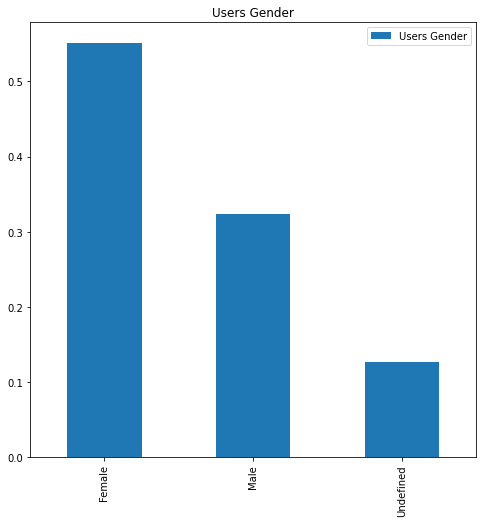

In [229]:
df = pd.DataFrame([0.551,0.323,0.126], index=['Female', 'Male', 'Undefined'], columns=['Users Gender'])
 
# make the plot
df.plot(kind='bar', subplots=True, figsize=(8, 8))

In [224]:
import matplotlib.pyplot as plt

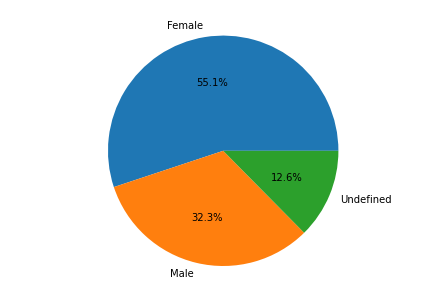

In [225]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie([0.551,0.323,0.126], labels=['Female', 'Male', 'Undefined'],autopct='%1.1f%%')
plt.show()